<a href="https://colab.research.google.com/github/saurabh423/Google-PlayStore-App-Review-Analysis/blob/main/Play_Store_App_Review_Analysis(Individual_Notebook)_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [51]:
# Playstore data  
working_dir_path3 = '/content/drive/MyDrive/Module 1: Python for data Science/Capston Project 1/dat/'
file_name3 = 'Copy of Play Store Data.csv'
df1=pd.read_csv(working_dir_path3 + file_name3)

In [52]:
# User Review Dataset
working_dir_path2 = '/content/drive/MyDrive/Module 1: Python for data Science/Capston Project 1/dat/'
file_name2 = 'Copy of User Reviews.csv'
df2=pd.read_csv(working_dir_path2 + file_name2)

# DF1 **Dataset** 

In [53]:
df1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


# **Nan Value presentation of df1 Means Play Store Data**

In [7]:
#sum of null values per column
df1.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Bar plot for the missing values in Play store data can be shown as :


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Nmber Of Nan values present in all columns')

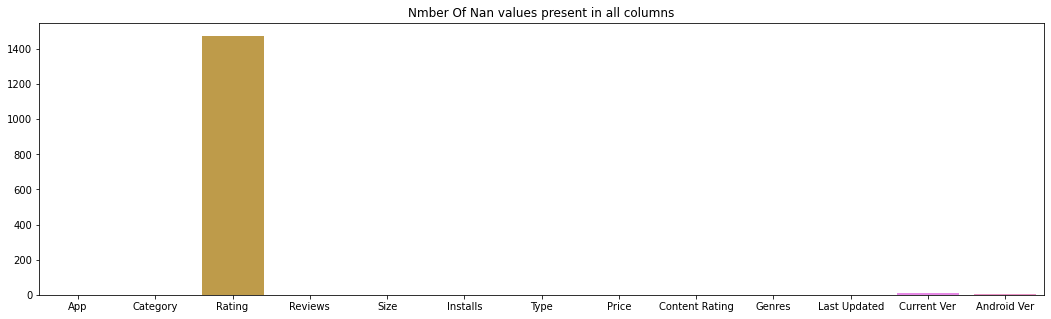

In [8]:
nan_columns = []
nan_values = []

for column in df1.columns:
    nan_columns.append(column)
    nan_values.append(df1[column].isnull().sum())

fig, ax = plt.subplots(figsize=(18,5))
sns.barplot(nan_columns, nan_values)
plt.title("Nmber Of Nan values present in all columns")

# **Data-cleanup & Missing value treatment for the Play store data**

In [54]:
df1 = df1.sort_values(by="Installs", ascending=False)
df1.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN
420,UC Browser - Fast Download Private & Secure,COMMUNICATION,4.5,17714850,40M,"500,000,000+",Free,0,Teen,Communication,"August 2, 2018",12.8.5.1121,4.0 and up
474,LINE: Free Calls & Messages,COMMUNICATION,4.2,10790289,Varies with device,"500,000,000+",Free,0,Everyone,Communication,"July 26, 2018",Varies with device,Varies with device


-As we see from the above the index "10472" have the values which are not what we  want so we remove that row

In [55]:
df1.drop([10472], inplace = True)

-As we know there are more null values present in Rating column so we dropped the null values from that column  

In [56]:
df1.dropna(how='all',subset=["Rating"],axis=0,inplace=True)

-We also have the nan values present in "Current Ver" & "Android Ver".
So, let's fill the missing values with the most common value in their respective columns

In [57]:
df1['Current Ver'].fillna(df1['Current Ver'].mode()[0],inplace=True)
df1['Android Ver'].fillna(df1['Android Ver'].mode()[0],inplace=True)

In [58]:
# After cleaning the data lets check the no. of missing values
df1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

-It's great we cleaned the missing data

-Now we will show by plotting the missing value bar plot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Nmber Of Nan values present in all columns after data cleaning')

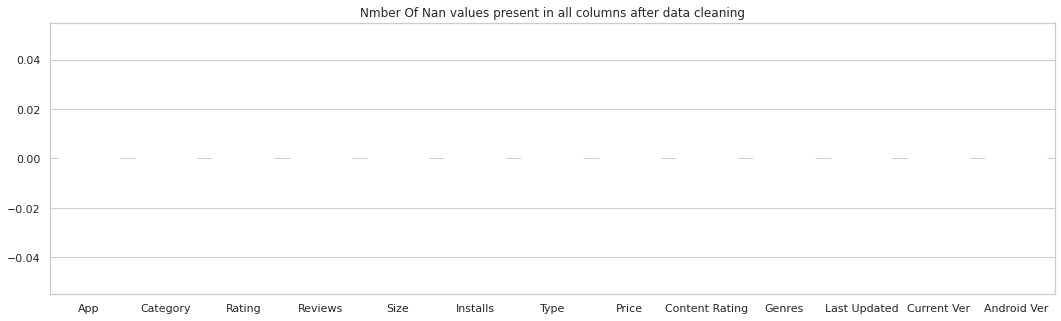

In [59]:
# Missing Value bar plot check
nan_columns = []
nan_values = []

for column in df1.columns:
    nan_columns.append(column)
    nan_values.append(df1[column].isnull().sum())

fig, ax = plt.subplots(figsize=(18,5))
sns.barplot(nan_columns, nan_values)
plt.title("Nmber Of Nan values present in all columns after data cleaning")

# **Analysis Count of popular Apps In Playstore Data**

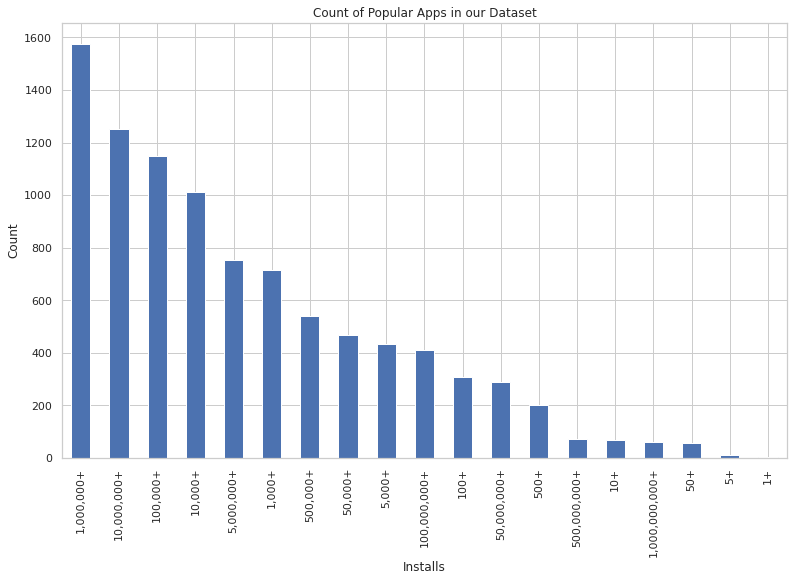

In [60]:
# WE take the count of values in Installs column & plot the bar
plt.figure(figsize=(13,8))
df1["Installs"].value_counts().plot(kind='bar')
plt.title("Count of Popular Apps in our Dataset")
plt.ylabel("Count")
plt.xlabel("Installs")
plt.show()

# **Analysis of App Category with Ratings And Installs**

In [61]:
# Now we groupby the Category with Rating & install
gk = df1.groupby('Category')['Rating'].mean()

In [62]:
pkk=gk.reset_index()

In [63]:
pkk.head()

,Category,Rating
0,ART_AND_DESIGN,4.358065
1,AUTO_AND_VEHICLES,4.190411
2,BEAUTY,4.278571
3,BOOKS_AND_REFERENCE,4.346067
4,BUSINESS,4.121452


In [64]:
pkk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  33 non-null     object 
 1   Rating    33 non-null     float64
dtypes: float64(1), object(1)
memory usage: 656.0+ bytes


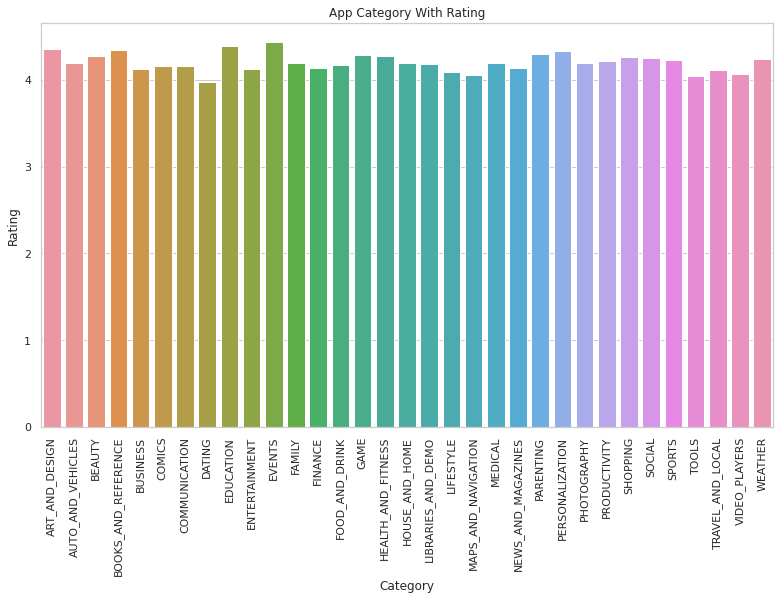

In [65]:
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 11,8.5
sns.set_theme(style="whitegrid")
af = sns.barplot(x='Category',y='Rating',data=pkk).set(title="App Category With Rating")
plt.xticks(rotation=90)
plt.tight_layout()

 - Similarlly Analysis of App Category w.r.t No. of Installs given below

Now we convert the Installs column data type from string to float(64).

In [69]:
# Removing "+" & "," in Install column
df1['Installs'] = df1['Installs'].apply(lambda x:x.replace("+","").replace(",","").strip() if "+" in str(x) else x)
df1['Installs'] = df1['Installs'].apply(lambda x:int(x))

In [71]:
df1['Installs'].unique()

array([ 500000000,     500000,        500,   50000000,      50000,
               50,    5000000,       5000,          5,  100000000,
           100000,        100,   10000000,      10000,         10,
       1000000000,    1000000,       1000,          1])

In [72]:
# Now we groupby the Category with install
dataset = df1.groupby('Category')['Installs'].mean()

In [73]:
pk = dataset.reset_index()

Text(0, 0.5, 'Installs')

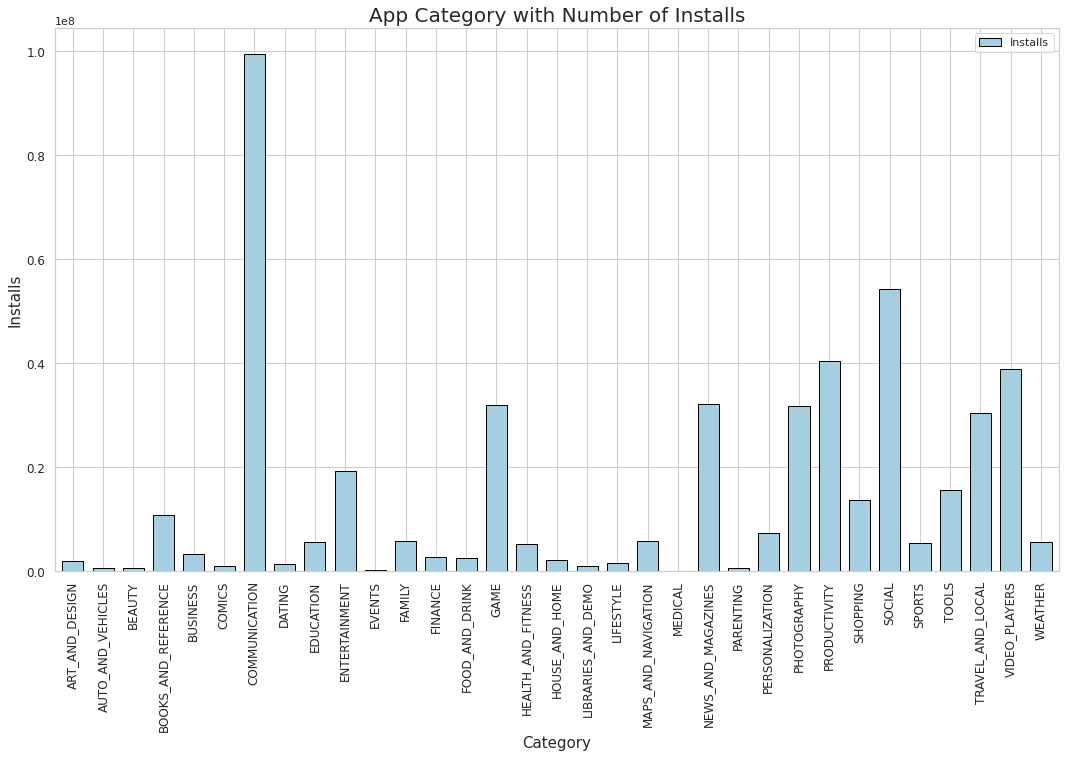

In [74]:
#Bar plot using matplotlib
az = pk.plot.bar( x ='Category',y = 'Installs',
    width=0.7,  # SETTING LINED EDGES TO CLEAR DETECRIONOF BARS
    linewidth=1,
    edgecolor='black',
    figsize = (18,10),
    fontsize = 12,colormap ='Paired')

az.set_title("App Category with Number of Installs", fontsize = 20)

# Set x and y-labels
az.set_xlabel("Category", fontsize = 15)
az.set_ylabel("Installs", fontsize = 15)

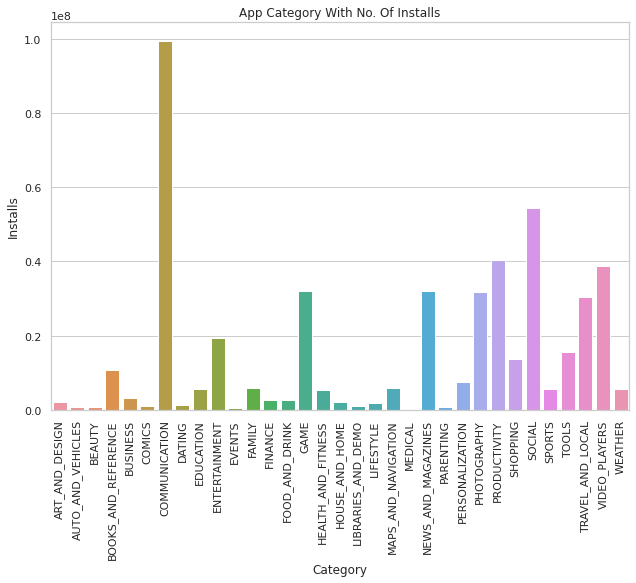

In [75]:
# Bar plot using seaborn
from pylab import rcParams
rcParams['figure.figsize'] = 9,8.27
sns.set_theme(style="whitegrid")
af = sns.barplot(x='Category',y='Installs',data=pk).set(title="App Category With No. Of Installs")
plt.xticks(rotation=90)
plt.tight_layout()

From above Chart, we can see that **GAME** Category ha most number of downloads, followed by **News_And_Magazines** and **Communication.**

# **Analyssis of Content Rating**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Unrecognized location 'right center'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


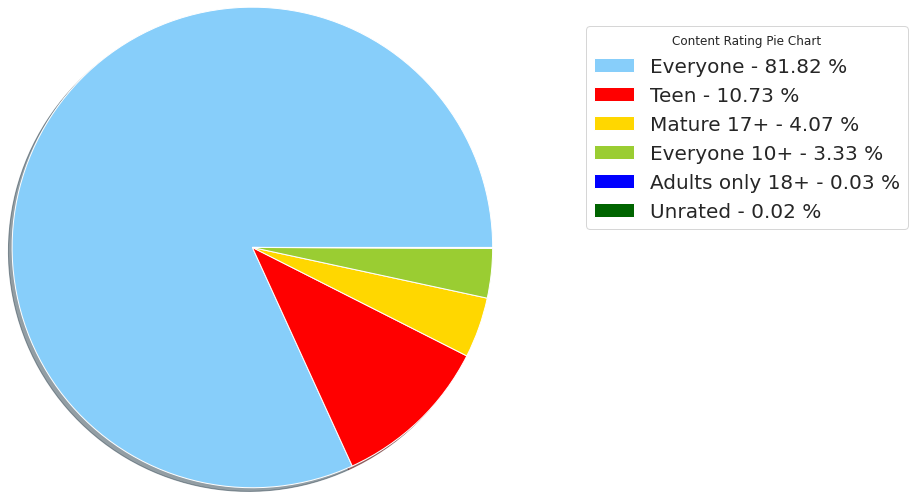

In [ ]:
# We Plot the pie chart for Content rating & showing their percentages 
import matplotlib.pyplot as plt
import numpy as np

x = np.char.array(['Everyone','Teen','Mature 17+','Everyone 10+','Adults only 18+','Unrated'])
y = np.array([7903, 1036,393,322, 3, 2])
colors = ['lightskyblue', 'red', 'gold','yellowgreen' ,'blue', 'darkgreen']
porcent = 100.*y/y.sum()

patches, texts = plt.pie(y, colors=colors,shadow=True, startangle=360, radius=1.3)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, porcent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels,title='Content Rating Pie Chart', loc='right center', bbox_to_anchor=(1.2, 1.),
           fontsize=20)

plt.savefig('piechart.png', bbox_inches='tight')

As we can see in the above pie chart Apps having content rating Everyone is more followed by Teen.

# **Play store Data Outlier detection and removal**

In [ ]:
df1.Rating.head()

0    4.5
1    4.2
2    4.4
3    4.1
4    4.2
Name: Rating, dtype: float64

In [ ]:
df1.Rating.describe()

count    9363.000000
mean        4.191498
std         0.515098
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


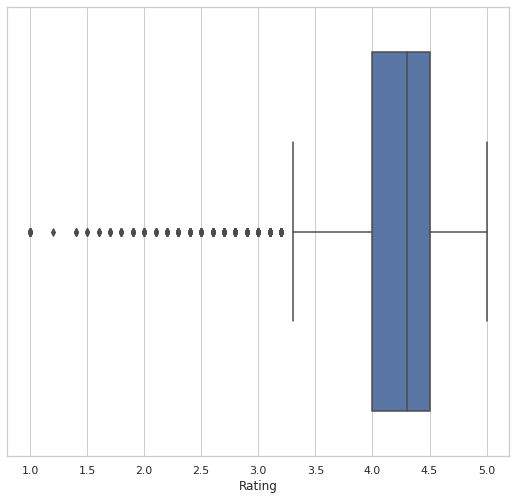

In [ ]:
ax = sns.boxplot(df1.Rating)

- The measure of symmetry Before Removing Of an Outlier given as

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


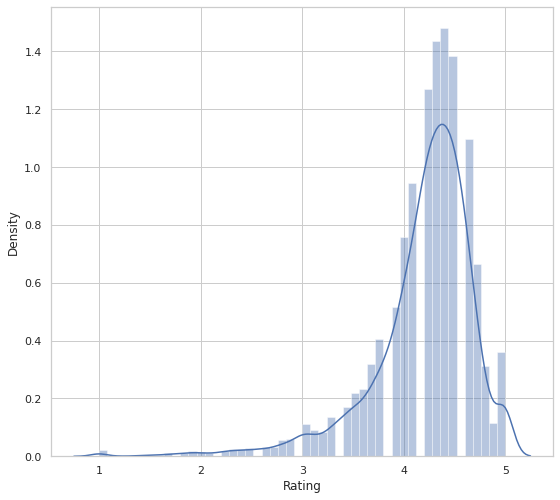

In [ ]:
sns.distplot(df1['Rating'], hist=True)

-  **After Removing Outliers :**

In [ ]:
def remove_outlier(df_in, col_name):

  # This is the function to remove an .
  
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    lower_limit  = q1-1.5*iqr
    upper_limit = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > lower_limit) & (df_in[col_name] < upper_limit)]
    return df_out

In [ ]:
removed_outlr=remove_outlier(df1, 'Rating')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


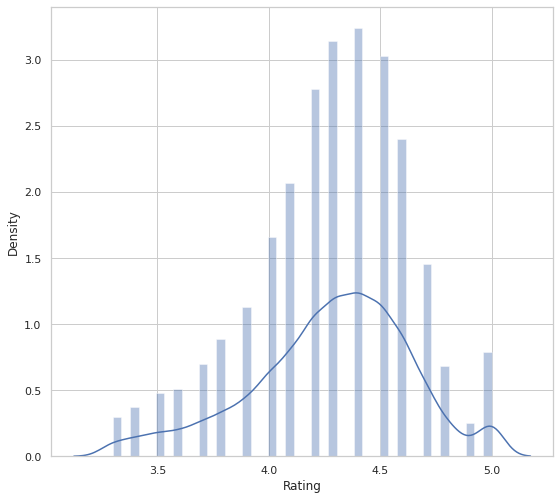

In [ ]:
sns.set_theme(style="whitegrid")
sns.distplot(removed_outlr['Rating'], hist=True)

-That's great, As we can see above the minimum values are removed which are the Outliers. 

-Now we plot the boxplot for the above:


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


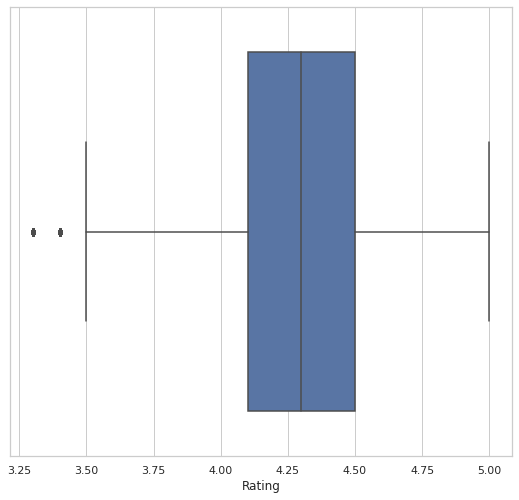

In [ ]:
ax = sns.boxplot(removed_outlr['Rating'])

# **User Review Dataset (as df2) Starts from here**

# **Nan value Bar Plot**

In [ ]:
#sum of null values per column
df2.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Number of Nan values present in all columns')

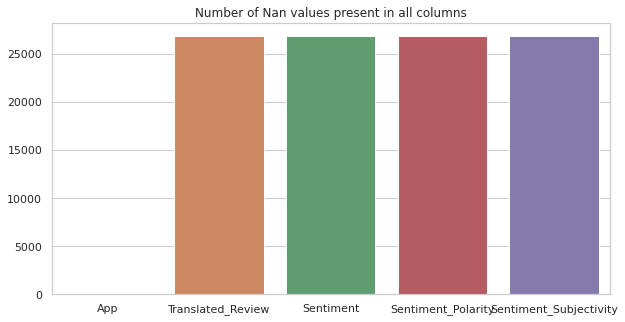

In [ ]:
# Missing values present in User review dataset (df2)
nan_columns = []
nan_values = []

for column in df2.columns:
    nan_columns.append(column)
    nan_values.append(df2[column].isnull().sum())

fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(nan_columns, nan_values)
plt.title("Number of Nan values present in all columns")

# **Analysis of Sentiments**

In [ ]:
df2 = df2.dropna()
df2.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 37427 entries, 0 to 64230
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     37427 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37427 non-null  object 
 3   Sentiment_Polarity      37427 non-null  float64
 4   Sentiment_Subjectivity  37427 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.7+ MB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Number of Nan values present in all columns after data cleaning')

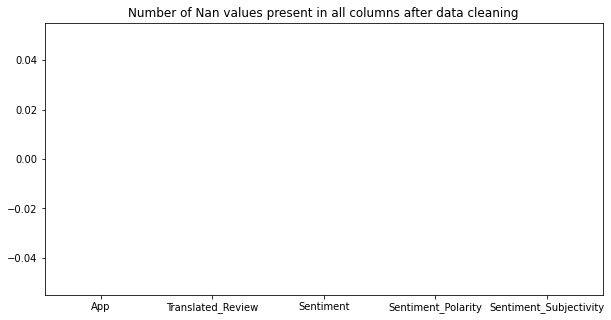

In [ ]:
# Nan value Bar Plot for cleaned Dataset2
nan_columns = []
nan_values = []

for column in df2.columns:
    nan_columns.append(column)
    nan_values.append(df2[column].isnull().sum())

fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(nan_columns, nan_values)
plt.title("Number of Nan values present in all columns after data cleaning")

 -Now we have a dataframe containing what we need on the side of sentiment analysis.

In [ ]:
# Now taking a slice of the original dataset containing app name and type, and merge it with matching apps in df2 dataset.
df2 = pd.merge(df2, df1[["App","Type"]] , how='inner', on="App")
# Droping null values from sentiment data
df2 = df2.dropna()

df2.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Type
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333,Free
1,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333,Free
2,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462,Free
3,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462,Free
4,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000,Free


In [ ]:
#  Let's see how many apps of each type we have:
(values,counts)= np.unique(df2["Type"], return_counts=True)
print(values)
print(counts)

['Free' 'Paid']
[71823   782]


From above we can say that the sample size of free apps is close to 90 times the size of paid ones.

In [ ]:
# Now we calculate the percentage of positive, neutral, and negative reviews for each dataset by creating their respective dataframes:
# A dataframe for each app type
free_apps = df2[df2["Type"] == "Free"]
paid_apps = df2[df2["Type"] == "Paid"]

In [ ]:
# Return normalized values (percentages) of each value's occurrence in sentiment & display them 
print("Free Apps - Sentiment Percentage \n"+"-"*40+"\n{}\n\n".format(free_apps['Sentiment'].value_counts(normalize=True) * 100))
print("Paid Apps - Sentiment Percentage \n"+"-"*40+"\n{}".format(paid_apps['Sentiment'].value_counts(normalize=True) * 100))

Free Apps - Sentiment Percentage 
----------------------------------------
Positive    63.446250
Negative    25.089456
Neutral     11.464294
Name: Sentiment, dtype: float64


Paid Apps - Sentiment Percentage 
----------------------------------------
Positive    80.051151
Negative    14.578005
Neutral      5.370844
Name: Sentiment, dtype: float64


-Now we will be using index names to pick a random sample from free apps in order to perform head-to-head comparison.

-As we have 782 entries in paid app so for head to head comparison we pick a random sample from free apps.

In [ ]:
# Make random, consistent choice of rows from free apps
np.random.seed(777)

# Reset index, then drop the old index column when it is moved to the right as a new column
paid_apps = paid_apps.reset_index().drop(columns=["index"])
free_apps = free_apps.reset_index().drop(columns=["index"])

# Generate a list of random indexes applicable to free_apps
random_indexes = np.random.choice(len(free_apps)-1, len(paid_apps), replace=False)

# Shorten free_apps to the same size of paid_apps & using a random selection
free_apps = free_apps.iloc[random_indexes]

# Reset index of free_apps
free_apps = free_apps.reset_index().drop(columns=["index"])

In [ ]:
# Check the length of free apps
len(free_apps)

782

-Now we have two samples of equal size for both app types.

-Now we move on to plotting counts of sentiments in each app type:



In [ ]:
# Counting the values for free & paid apps & storing it into separate dataframe each
val_cnt_free_apps=free_apps.Sentiment.value_counts().reset_index()
val_cnt_paid_apps=paid_apps.Sentiment.value_counts().reset_index()


In [ ]:
#Now merging both above dataframes on sentiment names
df = pd.merge(val_cnt_paid_apps, val_cnt_free_apps, on='index')
# Renaming the existing DataFrame (rather than creating a copy) 
df.rename(columns={'index': 'Sentiment Type', 'Sentiment_x': 'Paid_Count','Sentiment_y': 'Free_Count'}, inplace=True)

In [ ]:
df

,Sentiment Type,Paid_Count,Free_Count
0,Positive,626,503
1,Negative,114,193
2,Neutral,42,86


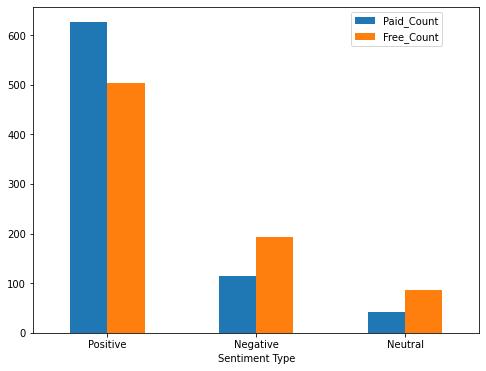

In [ ]:
df.plot.bar(x='Sentiment Type',figsize=(8, 6))
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(.7,1), loc='upper left')
plt.show()


# **Analysis Sentiment Polarity**

-The polarity of a sentiment measures how negative or positive the context is.

-In the data that we have, the polarity ranges from -1 (most negative) to +1 (most positive).

- Let's find out by plotting polarity for both free & paid app types:

In [ ]:
# Define variables that contain sentiment polarity for each app type
polarity_paid = paid_apps["Sentiment_Polarity"]
polarity_free = free_apps["Sentiment_Polarity"]

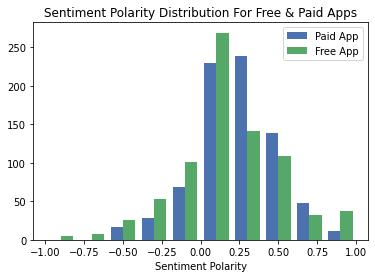

In [ ]:
plt.style.use('seaborn-deep')
plt.hist([polarity_paid, polarity_free], label=['Paid App', 'Free App'])
plt.title('Sentiment Polarity Distribution For Free & Paid Apps')
plt.xlabel('Sentiment Polarity')
plt.legend(loc='upper right')
plt.show()

-Now we measure the symmetry of polarity_free & polarity_paid Apps

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


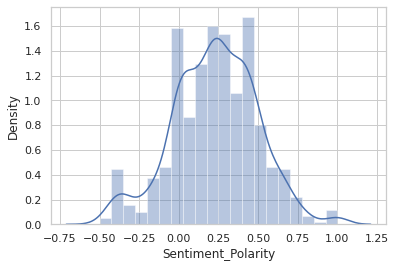

In [ ]:
sns.set_theme(style="whitegrid")
sns.distplot(polarity_paid, hist=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


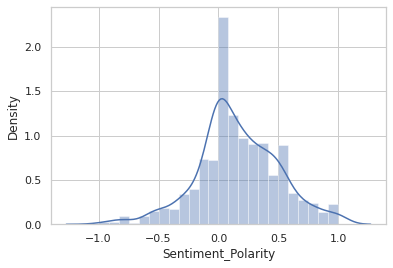

In [ ]:
sns.set_theme(style="whitegrid")
sns.distplot(polarity_free, hist=True)

-Now, let's plot the boxplot for Sentiment Polarities of Free & Paid Apps

In [ ]:

polarity_paid = paid_apps["Sentiment_Polarity"].reset_index()
polarity_free = free_apps["Sentiment_Polarity"].reset_index()

In [ ]:
#Renaming the name to free & paid 
paid = polarity_paid.rename(columns={'Sentiment_Polarity':'Paid'})
free = polarity_free.rename(columns={'Sentiment_Polarity':'Free'})

In [ ]:
# Now concating the above dataframes
cdff = pd.concat([paid,free],axis=1)

Text(0.5, 1.0, 'Boxplot for Sentiment Polarities of Free & Paid Apps')

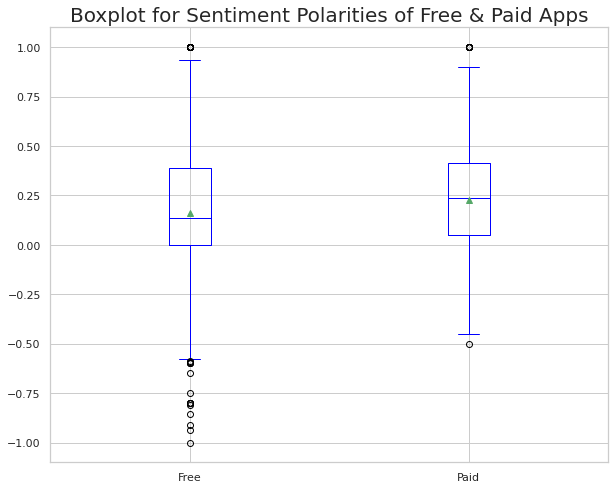

In [ ]:
ax=cdff.boxplot(column=['Free','Paid'],figsize=(10,8),showfliers=True,color='blue', showmeans=True, rot=0)
ax.set_title("Boxplot for Sentiment Polarities of Free & Paid Apps",fontsize=20)

From the boxplot we can say that the paid app have more positive sentiment polarity compare to free apps.

# **Sentiment Analysis with Category**

In [ ]:
# First we merge the Category & App of 1st data set to App column in 2nd data set
df22 = pd.merge(df2, df1[["App","Category"]] , how='inner', on="App")
# Drop all nan values
df22 =df22.dropna()


In [ ]:
df22.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Category
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333,HEALTH_AND_FITNESS
1,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333,HEALTH_AND_FITNESS
2,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462,HEALTH_AND_FITNESS
3,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462,HEALTH_AND_FITNESS
6,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000,HEALTH_AND_FITNESS


In [ ]:
df22.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72566 entries, 0 to 122380
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     72566 non-null  object 
 1   Translated_Review       72566 non-null  object 
 2   Sentiment               72566 non-null  object 
 3   Sentiment_Polarity      72566 non-null  float64
 4   Sentiment_Subjectivity  72566 non-null  float64
 5   Category                72566 non-null  object 
dtypes: float64(2), object(4)
memory usage: 3.9+ MB


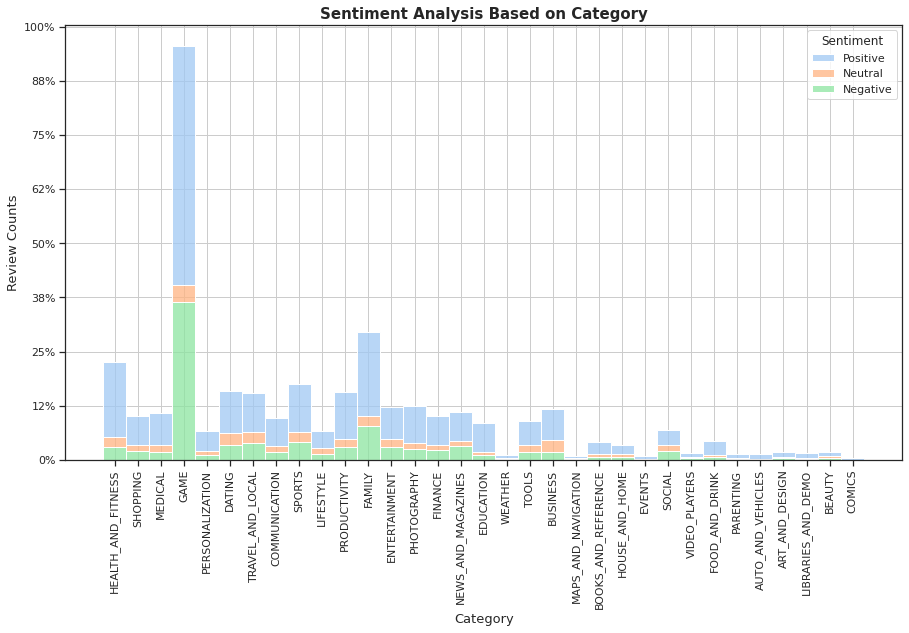

In [ ]:
import seaborn as sns
from matplotlib.ticker import PercentFormatter
f = plt.figure(figsize=(15,8))
ax = f.add_subplot(1,1,1)
sns.histplot(data=df22,bins=34, ax=ax, stat="count", multiple="stack",
             x="Category",kde=False,
             palette="pastel", hue="Sentiment",
             element="bars",color= 'blue', legend=True)
ax.set_title("Sentiment Analysis Based on Category",fontsize=15,fontweight='bold')
plt.xticks(rotation='vertical')
ax.set_xlabel("Category",fontsize=13)
ax.set_ylabel("Review Counts",fontsize=13)
plt.gca().yaxis.set_major_formatter(PercentFormatter(20000))
sns.set(style="ticks")
plt.grid()
plt.show()


Family, Sports and Health & Fitness apps perform the best, Having more than 50% positive reviews

On the contrary, many Game and Social apps perform decent leading to 50% positive and 50% negative.

# **Sentiment Subjectivity Distributiion of Free & Paid Apps**

The lower the subjectivity, the more the sentiment is based on data or factual information. For this sentiment analysis, subjectivity values range from 0 (least subjective) to 1 (most subjective).

In [ ]:
# Define variables that contain sentiment subjectivity for each app type
subjectivity_paid = paid_apps["Sentiment_Subjectivity"]
subjectivity_free = free_apps["Sentiment_Subjectivity"]



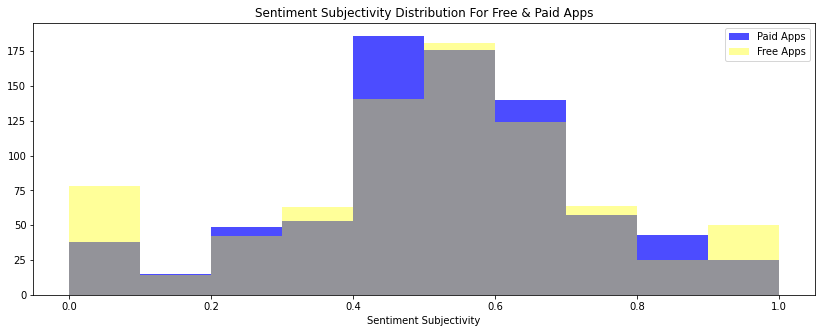

In [ ]:
# Plot two histograms showing sentiment subjectivity of each app type
plt.figure(figsize=(14,5))
plt.hist(subjectivity_paid, color="blue",alpha=.7, label="Paid Apps") 
plt.hist(subjectivity_free, color="yellow",alpha=.4, label="Free Apps")
plt.title('Sentiment Subjectivity Distribution For Free & Paid Apps')
plt.xlabel('Sentiment Subjectivity')
plt.legend(loc='upper right')
plt.show()

Both paid and free apps appear to have a distribution of sentiment subjectivity that is very close to a normal distribution, although paid apps have more data around the mean.

The general subjectivity of reviews of paid apps seem to be barely decrease than that of paid apps.

# **Conclusion:**

*   The top 3 categories with most number of installs are **Communication, Social** and **Productivity**.
*   There is almost 40-45% Nan values in sentiment dataset except an App column.

*   Positive sentiment for Paid apps is greater compare to Positive sentiment of Free apps also Free apps have more negative and neutral reviews.

*   Sentiment Polarity indicates more general satisfaction with paid apps, and proving a minimum limitation for negative sentiments.
*   The top three categories such as Game, Family, Health & Fitness Apps have more positive sentiments compare to others.



